### LangChain based NewsArticle Summarizer

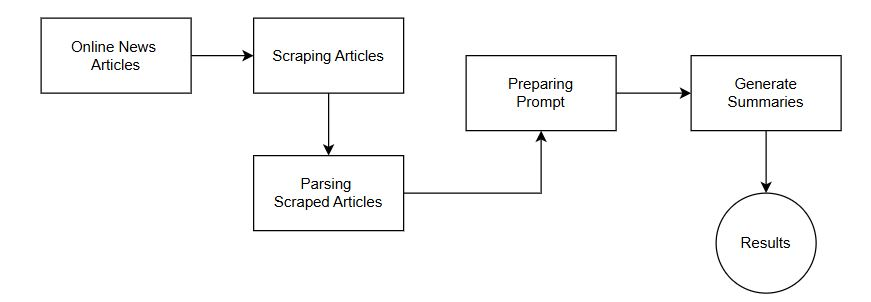

In [11]:
from IPython.display import Image
Image(filename='news_summarizer.JPG',width=800, height=400)

Download/Scrape any newsarticle using the relevant imports

In [22]:
import requests
import json
from newspaper import Article

headers = {
    'User-Agent': '''Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'''
}

article_url = """https://www.artificialintelligence-news.com/2022/01/25/meta-claims-new-ai-supercomputer-will-set-records/"""

session = requests.Session()

try:
    response = session.get(article_url, headers=headers, timeout=10)
    
    if response.status_code == 200:
        article = Article(article_url)
        article.download()
        article.parse()
        
        print(f"Title: {article.title}")
        print(f"Text: {article.text}")
        
    else:
        print(f"Failed to fetch article at {article_url}")
except Exception as e:
    print(f"Error occurred while fetching article at {article_url}: {e}")

Title: Meta claims its new AI supercomputer will set records
Text: Ryan Daws is a senior editor at TechForge Media with over a decade of experience in crafting compelling narratives and making complex topics accessible. His articles and interviews with industry leaders have earned him recognition as a key influencer by organisations like Onalytica. Under his leadership, publications have been praised by analyst firms such as Forrester for their excellence and performance. Connect with him on X (@gadget_ry), Bluesky (@gadgetry.bsky.social), and/or Mastodon (@gadgetry@techhub.social)

Meta (formerly Facebook) has unveiled an AI supercomputer that it claims will be the world’s fastest.

The supercomputer is called the AI Research SuperCluster (RSC) and is yet to be fully complete. However, Meta’s researchers have already begun using it for training large natural language processing (NLP) and computer vision models.

RSC is set to be fully built in mid-2022. Meta says that it will be the f

In [25]:
from langchain.schema import (
    HumanMessage
)
from langchain.chat_models import ChatOpenAI

# we get the article data from the scraping part
article_title = article.title
article_text = article.text

# prepare template for prompt
template ="""You are a very good assistant that summarizes online articles.
Here's the article you want to summarize.
==================
Title: {article_title}

{article_text}
==================
Write a summary of the previous article.
"""

prompt = template.format(article_title=article.title, article_text=article.text)

messages = [HumanMessage(content=prompt)]

In [24]:
messages

[HumanMessage(content="You are a very good assistant that summarizes online articles.\nHere's the article you want to summarize.\n==================\nTitle: Meta claims its new AI supercomputer will set records\n\nRyan Daws is a senior editor at TechForge Media with over a decade of experience in crafting compelling narratives and making complex topics accessible. His articles and interviews with industry leaders have earned him recognition as a key influencer by organisations like Onalytica. Under his leadership, publications have been praised by analyst firms such as Forrester for their excellence and performance. Connect with him on X (@gadget_ry), Bluesky (@gadgetry.bsky.social), and/or Mastodon (@gadgetry@techhub.social)\n\nMeta (formerly Facebook) has unveiled an AI supercomputer that it claims will be the world’s fastest.\n\nThe supercomputer is called the AI Research SuperCluster (RSC) and is yet to be fully complete. However, Meta’s researchers have already begun using it for 

In [26]:
# load the model
chat = ChatOpenAI(model_name="gpt-4-turbo", temperature=0)
# generate summary
summary = chat(messages)
print(summary.content)

Meta, formerly known as Facebook, has announced the development of the AI Research SuperCluster (RSC), which it claims will be the world's fastest AI supercomputer upon its completion in mid-2022. The RSC is designed to train large-scale natural language processing (NLP) and computer vision models, with capabilities to handle models with trillions of parameters. Meta envisions the RSC will enable advancements such as real-time voice translations for large, multilingual groups, and will significantly contribute to the development of the metaverse, where AI-driven applications will be crucial. The RSC is expected to be 20 times faster than Meta's current systems and will incorporate enhanced security and privacy controls to utilize real-world data from Meta's platforms for training purposes. This development aims to improve the performance, reliability, security, and privacy of AI research at a large scale.


__Changing the points into bullet-ins__

In [27]:
from langchain.schema import (
    HumanMessage
)
from langchain.chat_models import ChatOpenAI

# we get the article data from the scraping part
article_title = article.title
article_text = article.text

# prepare template for prompt
template ="""You are an advanced AI assistant that summarizes online articles into bulleted lists.
==================
Title: {article_title}

{article_text}
==================
Write a summary of the previous article.
"""

prompt = template.format(article_title=article.title, article_text=article.text)

messages = [HumanMessage(content=prompt)]

In [28]:
# load the model
chat = ChatOpenAI(model_name="gpt-4-turbo", temperature=0)
# generate summary
summary = chat(messages)
print(summary.content)

- Meta (formerly Facebook) has announced the development of the AI Research SuperCluster (RSC), which it claims will be the world's fastest AI supercomputer upon completion.
- The RSC is designed to train large natural language processing (NLP) and computer vision models and is expected to be fully operational by mid-2022.
- Meta aims for the RSC to handle training models with trillions of parameters, significantly enhancing capabilities such as real-time voice translations for diverse language groups.
- The supercomputer is projected to be 20 times faster than Meta's current V100-based clusters and will improve efficiency in training large-scale NLP workflows.
- RSC incorporates enhanced security and privacy controls, allowing Meta to utilize real-world data from its production systems for training purposes.
- This development is part of Meta's broader vision to support the creation of technologies for the metaverse, where AI-driven applications will be crucial.
- The article also men